In [88]:
class Fuzzy():

    def __init__(self):
        self.max = 0
        self.mid_buy = 0
        self.mid_frek = 0
        self.min = 0

    # Fungsi untuk memastikan hasil berada di rentang [0, 1]
    def normalize(self, value):
        return max(0, min(1, value))

    # Total_buy
    def low(self, x):
        result = (self.mid_buy - x) / (self.mid_buy - self.min)
        return self.normalize(result)

    def reasonable(self, x):
        if x >= self.mid_buy:  # Jika x lebih besar atau sama dengan titik tengah (self.mid)
            result = (self.max - x) / (self.max - self.mid_buy)
        elif x < self.mid_buy:  # Jika x lebih kecil dari titik tengah
            result = (x - self.min) / (self.mid_buy - self.min)
        return self.normalize(result)
    
    def high(self, x):
        result = (x - self.mid_buy) / (self.max - self.mid_buy)
        return self.normalize(result)

    # Frek_cust
    def rarely(self, x):
        result = (self.mid_frek - x) / (self.mid_frek - self.min)
        return self.normalize(result)
    
    def sometime(self, x):
        if x >= self.mid_frek:  # Jika x lebih besar atau sama dengan titik tengah (self.mid)
            result = (self.max - x) / (self.max - self.mid_frek)
        elif x < self.mid_frek:  # Jika x lebih kecil dari titik tengah
            result = (x - self.min) / (self.mid_frek - self.min)
        return self.normalize(result)

    def often(self, x):
        result = (x - self.mid_frek) / (self.max - self.mid_frek)
        return self.normalize(result)


    #end
    def rev_small(self, value):
        return self.max - value * (self.max - self.min)

    def rev_big(self, value):
        return value * (self.max - self.min) + self.min

In [89]:
# Jumlah Pembelian
# rendah (low) min = 0 max = 50
# lumayan (reasonable) min = 30 mid = 50 max = 70
# tinggi (high) min = 50 max = 100
# x = 70

fis = Fuzzy()

fis.min = 0
fis.mid_buy = 50
fis.max = 100

rendah = fis.low(70)
print(f"Nilai fuzzy variable permintaan himpunan turun adalah: {rendah}")

lumayan = fis.reasonable(70)
print(f"Nilai fuzzy variable permintaan himpunan tetap adalah: {lumayan}")

tinggi = fis.high(70)
print(f"Nilai fuzzy variable permintaan himpunan naik adalah: {tinggi}")

Nilai fuzzy variable permintaan himpunan turun adalah: 0
Nilai fuzzy variable permintaan himpunan tetap adalah: 0.6
Nilai fuzzy variable permintaan himpunan naik adalah: 0.4


In [90]:
# Frekuensi pelanggan
# jarang (rarely) min = 0 max = 5
# kadang (mid_frek) min = 3 mid = 5 max = 7
# sering (often) min = 5 max = 10
# x = 8

fis.min = 0
fis.mid_frek = 5
fis.max = 10

jarang = fis.rarely(8)
print(f"Nilai fuzzy variable Persediaan himpunan sedikit adalah: {jarang}")

kadang = fis.sometime(8)
print(f"Nilai fuzzy variable Persediaan himpunan sedang adalah: {kadang}")

sering = fis.often(8)
print(f"Nilai fuzzy variable Persediaan himpunan banyak adalah: {sering}")


Nilai fuzzy variable Persediaan himpunan sedikit adalah: 0
Nilai fuzzy variable Persediaan himpunan sedang adalah: 0.4
Nilai fuzzy variable Persediaan himpunan banyak adalah: 0.6


In [91]:
class Jumlah_pembelian(Fuzzy):
    def __init__(self):
        self.min = 0
        self.mid_buy = 50
        self.max = 100

    def rendah(self, x):
        if x <= self.min:
            return 1
        if x >= self.mid_buy:
            return 0
        return self.low(x)

    def lumayan(self, x):
        if x < self.min or x > self.max:
            return 0
        return self.reasonable(x)

    def tinggi(self, x):
        if x <= self.mid_buy:
            return 0
        if x >= self.max:
            return 1
        return self.high(x)


class Frekuensi_pelanggan(Fuzzy):
    def __init__(self):
        self.min = 0
        self.mid_frek = 5
        self.max = 10

    def jarang(self, x):
        if x <= self.min:
            return 1
        if x >= self.mid_frek:
            return 0
        return self.rarely(x)

    def kadang(self, x):
        if x < self.min or x > self.max:
            return 0
        return self.sometime(x)

    def sering(self, x):
        if x <= self.mid_frek:
            return 0
        if x >= self.max:
            return 1
        return self.often(x)


class Diskon(Fuzzy):
    def __init__(self):
        super().__init__()
        self.min = 0
        self.max = 50

    def kecil(self, fuzzy_value):
        return self.rev_small(fuzzy_value)

    def besar(self, fuzzy_value):
        return self.rev_big(fuzzy_value)


In [92]:
rule_map = {
    ("rendah", "jarang"): "besar",
    ("rendah", "kadang"): "kecil",
    ("rendah", "sering"): "kecil",
    ("lumayan", "jarang"): "besar",
    ("lumayan", "kadang"): "kecil",
    ("lumayan", "sering"): "kecil",
    ("tinggi", "jarang"): "besar",
    ("tinggi", "kadang"): "besar",
    ("tinggi", "sering"): "kecil"
}

In [93]:
fuzzy_real = 0
fuzzy = 0

# Iterasi untuk setiap aturan di rule_map
for k, v in rule_map.items():
    # Inisialisasi objek fuzzy
    total_buy = Jumlah_pembelian()
    frek_cust = Frekuensi_pelanggan()
    disc = Diskon()
    
    # Input nilai x_total_buy dan x_frek_cust
    x_total_buy = 70
    x_frek_cust = 8

    # Hitung nilai fuzzy untuk total pembelian
    if k[0] == "rendah":
        total_buy_value = total_buy.rendah(x_total_buy)
    elif k[0] == "lumayan":
        total_buy_value = total_buy.lumayan(x_total_buy)
    elif k[0] == "tinggi":
        total_buy_value = total_buy.tinggi(x_total_buy)

    # Hitung nilai fuzzy untuk frekuensi pelanggan
    if k[1] == "jarang":
        frek_cust_value = frek_cust.jarang(x_frek_cust)
    elif k[1] == "kadang":
        frek_cust_value = frek_cust.kadang(x_frek_cust)
    elif k[1] == "sering":
        frek_cust_value = frek_cust.sering(x_frek_cust)

    # Nilai fuzzy minimum (inferensi fuzzy)
    disc_value = min(total_buy_value, frek_cust_value)

    # Hitung hasil defuzzifikasi
    if v == "besar":
        x_disc = disc.besar(disc_value)
    elif v == "kecil":
        x_disc = disc.kecil(disc_value)
    
    # Debugging log untuk setiap iterasi
    print(f"Rule: {k}, Total Pembelian: {total_buy_value:.2f}, Frekuensi Pelanggan: {frek_cust_value:.2f}, Diskon: {disc_value:.2f}, x_disc: {x_disc:.2f}")
    
    # Akumulasi nilai fuzzy_real dan fuzzy
    fuzzy_real += disc_value * x_disc
    fuzzy += disc_value

# Hasil akhir defuzzifikasi
if fuzzy == 0:  # Hindari pembagian dengan nol
    result = 0
else:
    result = float(fuzzy_real / fuzzy)

print(f"Fuzzy Real: {fuzzy_real:.2f}, Fuzzy: {fuzzy:.2f}")
print(f"Jadi, diskon yang didapatkan adalah {result:.2f}%")

Rule: ('rendah', 'jarang'), Total Pembelian: 0.00, Frekuensi Pelanggan: 0.00, Diskon: 0.00, x_disc: 0.00
Rule: ('rendah', 'kadang'), Total Pembelian: 0.00, Frekuensi Pelanggan: 0.40, Diskon: 0.00, x_disc: 50.00
Rule: ('rendah', 'sering'), Total Pembelian: 0.00, Frekuensi Pelanggan: 0.60, Diskon: 0.00, x_disc: 50.00
Rule: ('lumayan', 'jarang'), Total Pembelian: 0.60, Frekuensi Pelanggan: 0.00, Diskon: 0.00, x_disc: 0.00
Rule: ('lumayan', 'kadang'), Total Pembelian: 0.60, Frekuensi Pelanggan: 0.40, Diskon: 0.40, x_disc: 30.00
Rule: ('lumayan', 'sering'), Total Pembelian: 0.60, Frekuensi Pelanggan: 0.60, Diskon: 0.60, x_disc: 20.00
Rule: ('tinggi', 'jarang'), Total Pembelian: 0.40, Frekuensi Pelanggan: 0.00, Diskon: 0.00, x_disc: 0.00
Rule: ('tinggi', 'kadang'), Total Pembelian: 0.40, Frekuensi Pelanggan: 0.40, Diskon: 0.40, x_disc: 20.00
Rule: ('tinggi', 'sering'), Total Pembelian: 0.40, Frekuensi Pelanggan: 0.60, Diskon: 0.40, x_disc: 30.00
Fuzzy Real: 44.00, Fuzzy: 1.80
Jadi, diskon ya

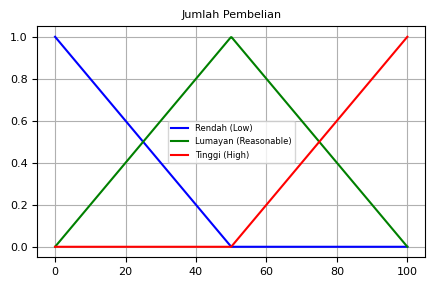

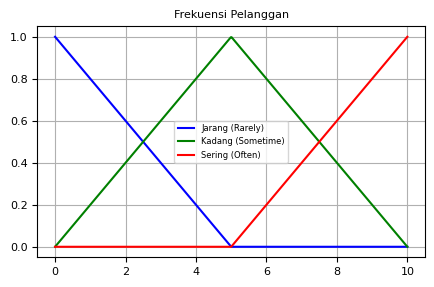

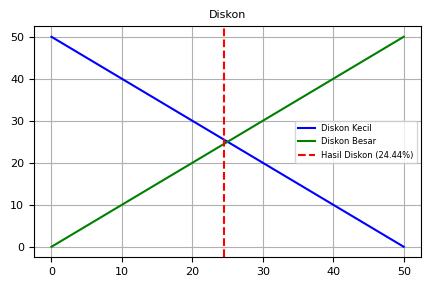

In [96]:
import numpy as np
import matplotlib.pyplot as plt

# Function Jumlah Pembelian
def plot_membership_total_buy():
    x = np.linspace(0, 100, 500)  # Range dari 0 ke 100
    fis = Fuzzy()
    fis.min = 0
    fis.mid_buy = 50
    fis.max = 100

    low = [fis.low(i) for i in x]
    reasonable = [fis.reasonable(i) for i in x]
    high = [fis.high(i) for i in x]

    plt.figure(figsize=(5, 3))
    plt.plot(x, low, label="Rendah (Low)", color="blue")
    plt.plot(x, reasonable, label="Lumayan (Reasonable)", color="green")
    plt.plot(x, high, label="Tinggi (High)", color="red")
    plt.title("Jumlah Pembelian", fontsize=8)
    plt.legend(fontsize=6)
    plt.grid(True)
    plt.tick_params(axis='both', labelsize=8)
    plt.show()

# Function Frekuensi Pelanggan
def plot_membership_frek_cust():
    x = np.linspace(0, 10, 500)  # Range dari 0 ke 10
    fis = Fuzzy()
    fis.min = 0
    fis.mid_frek = 5
    fis.max = 10

    rarely = [fis.rarely(i) for i in x]
    sometime = [fis.sometime(i) for i in x]
    often = [fis.often(i) for i in x]

    plt.figure(figsize=(5, 3))
    plt.plot(x, rarely, label="Jarang (Rarely)", color="blue")
    plt.plot(x, sometime, label="Kadang (Sometime)", color="green")
    plt.plot(x, often, label="Sering (Often)", color="red")
    plt.title("Frekuensi Pelanggan", fontsize=8)
    plt.legend(fontsize=6)
    plt.tick_params(axis='both', labelsize=8)
    plt.grid(True)
    plt.show()

# Membership function untuk Diskon
def plot_membership_diskon(result):
    x = np.linspace(0, 50, 500)  # Range diskon dari 0 ke 50
    fis = Fuzzy()
    fis.min = 0
    fis.max = 50

    small = [fis.rev_small(i / 50) for i in x]  # Normalisasi nilai 0-1
    big = [fis.rev_big(i / 50) for i in x]

    plt.figure(figsize=(5, 3))
    plt.plot(x, small, label="Diskon Kecil", color="blue")
    plt.plot(x, big, label="Diskon Besar", color="green")
    plt.axvline(result, color="red", linestyle="--", label=f"Hasil Diskon ({result:.2f}%)")
    plt.title("Diskon", fontsize=8)
    plt.legend(fontsize=6)
    plt.tick_params(axis='both', labelsize=8)
    plt.grid(True)
    plt.show()



# Call untuk menampilkan grafik
plot_membership_total_buy()
plot_membership_frek_cust()


plot_membership_diskon(result)
